In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/image_recongnition_cnn_cifar')



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from models.simple_cnn import SimpleCNN
from utils.train_eval import train_eval_model
from utils.plot_metric import plot_metric
import numpy as np

In [4]:
model = SimpleCNN(
    img_size=64,
    in_chans=3,
    out_chans1=32,
    out_chans2=64,
    kernal_size=4,
    pool_size=2,
    hidden_dim=128,
    dropout=0.15
    )

In [5]:
epochs = 50
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
train_losses, train_accuracies, test_losses, test_accuracies = train_eval_model(
    model,
    optimizer=optimizer,
    criterion=criterion,
    epochs=epochs,
    dataset_name='cifar10',
    img_res=64,
    batch_size=128,
    device=device
    )

100%|██████████| 170M/170M [00:04<00:00, 41.6MB/s]


Epoch [1/50] - Train Loss: 1.9174 - Train Accuracy: 32.2120%
Epoch [1/50] - Test Loss: 1.6865 - Test Accuracy: 41.0700%
Epoch [2/50] - Train Loss: 1.6337 - Train Accuracy: 42.8660%
Epoch [2/50] - Test Loss: 1.5587 - Test Accuracy: 45.6500%
Epoch [3/50] - Train Loss: 1.5337 - Train Accuracy: 46.6600%
Epoch [3/50] - Test Loss: 1.4677 - Test Accuracy: 48.9300%
Epoch [4/50] - Train Loss: 1.4578 - Train Accuracy: 49.5700%
Epoch [4/50] - Test Loss: 1.4006 - Test Accuracy: 51.5500%
Epoch [5/50] - Train Loss: 1.4066 - Train Accuracy: 51.7180%
Epoch [5/50] - Test Loss: 1.3796 - Test Accuracy: 52.1500%
Epoch [6/50] - Train Loss: 1.3611 - Train Accuracy: 53.1600%
Epoch [6/50] - Test Loss: 1.3533 - Test Accuracy: 52.5600%
Epoch [7/50] - Train Loss: 1.3256 - Train Accuracy: 54.3380%
Epoch [7/50] - Test Loss: 1.2887 - Test Accuracy: 55.9000%
Epoch [8/50] - Train Loss: 1.2894 - Train Accuracy: 55.7420%
Epoch [8/50] - Test Loss: 1.2577 - Test Accuracy: 57.6400%
Epoch [9/50] - Train Loss: 1.2598 - Trai

In [7]:
train_accuracies = np.array(train_accuracies)
test_acc = np.array(test_accuracies)
epochs = np.arange(0, len(train_accuracies))

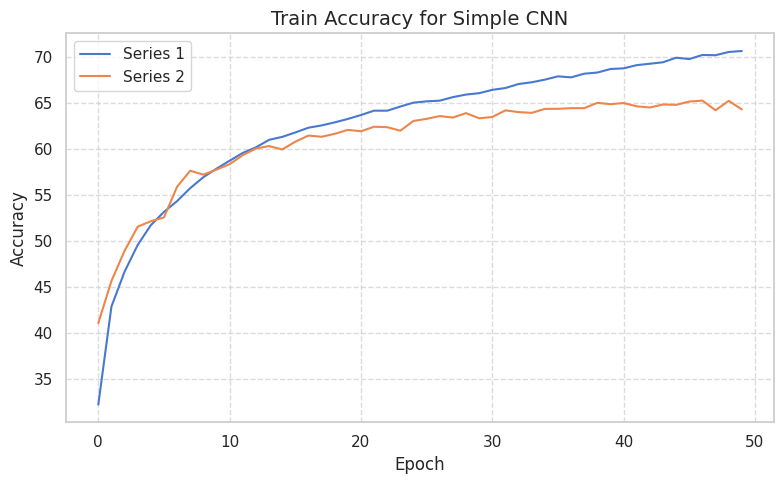

In [8]:

plot_metric(
    x=epochs,
    y_list=[train_accuracies, test_acc],
    y_label='Accuracy',
    title='Train Accuracy for Simple CNN',
    labels=None
)